In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as ss
import warnings
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [ ]:
df_car = pd.read_csv('df_car.csv')

In [ ]:
def access_NA(df_car):
    
    null_sum = df_car.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(df_car.index))*100).round(2) ).sort_values(ascending=False)
    
    
    data_car_na = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    data_car_na = data_car_na[ (data_car_na.T != 0).any() ]
    
    return data_car_na

access_NA(df_car)

,Number of NA,Percent NA
C_TRAF,223483,3.81
C_CONF,179019,3.05
P_USER,175586,3.00
C_WTHR,87975,1.50
C_RSUR,78451,1.34
P_PSN,57662,0.98
V_TYPE,29754,0.51
V_ID,433,0.01
P_ID,16,0.00


In [ ]:
df_car

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2,34,02,1,5,...,1.0,06,1990,01,M,41,11,1,02,1.0
1,1999,1,1,20,0,2,34,02,1,5,...,2.0,01,1987,01,M,19,11,1,02,1.0
2,1999,1,1,20,0,2,34,02,1,5,...,2.0,01,1987,02,F,20,13,2,02,2.0
3,1999,1,1,8,0,1,01,02,5,3,...,1.0,01,1986,01,M,46,11,1,02,1.0
4,1999,1,1,8,0,1,01,02,5,3,...,99.0,NN,2000,01,M,5,99,2,02,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,8,5,16,0,2,NaN,01,NaN,NaN,...,13.0,07,2000,01,M,24,11,1,NN,1.0
5860401,2014,8,5,23,0,1,06,05,1,1,...,1.0,14,2006,01,M,29,96,2,09,5.0
5860402,2014,8,5,14,0,1,02,01,1,5,...,1.0,01,2006,01,F,36,11,2,01,1.0
5860403,2014,8,5,22,1,1,06,01,2,4,...,1.0,22,2000,01,M,67,12,3,01,NaN


In [ ]:
df_car = df_car.drop(['P_ID', 'V_ID', 'C_YEAR'], axis = 1)

In [ ]:
cat_data = df_car.select_dtypes(include = ['object', 'category']).columns

In [ ]:
cat_data

Index(['C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE',
       'P_SEX', 'P_PSN', 'P_ISEV', 'P_SAFE'],
      dtype='object')

In [ ]:
TE = ce.TargetEncoder(cols = cat_data)
model = TE.fit(df_car, df_car['C_SEV'])

In [ ]:
df_car_t = model.transform(df_car)
df_car_t

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1,1,20,0,2,0.011981,0.010041,0.015971,0.018736,0.037152,0.013492,0.024206,1990,0.019869,41,0.014568,0.008489,0.013672,1.0
1,1,1,20,0,2,0.011981,0.010041,0.015971,0.018736,0.037152,0.013492,0.014276,1987,0.019869,19,0.014568,0.008489,0.013672,1.0
2,1,1,20,0,2,0.011981,0.010041,0.015971,0.018736,0.037152,0.013492,0.014276,1987,0.012573,20,0.018360,0.011078,0.013672,2.0
3,1,1,8,0,1,0.031559,0.010041,0.026706,0.018832,0.036560,0.024120,0.014276,1986,0.019869,46,0.014568,0.008489,0.013672,1.0
4,1,1,8,0,1,0.031559,0.010041,0.026706,0.018832,0.036560,0.024120,0.028647,2000,0.019869,5,0.028939,0.011078,0.013672,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,8,5,16,0,2,0.014127,0.027761,0.008900,0.010223,0.013326,0.014390,0.037169,2000,0.019869,24,0.014568,0.008489,0.014356,1.0
5860401,8,5,23,0,1,0.025422,0.022697,0.015971,0.016910,0.013326,0.024120,0.030024,2006,0.019869,29,0.048233,0.011078,0.030206,5.0
5860402,8,5,14,0,1,0.024634,0.027761,0.015971,0.018736,0.040331,0.024120,0.014276,2006,0.012573,36,0.014568,0.011078,0.081130,1.0
5860403,8,5,22,1,1,0.025422,0.027761,0.020859,0.021557,0.010244,0.024120,0.070696,2000,0.019869,67,0.020588,1.000000,0.081130,NaN


In [ ]:
access_NA(df_car_t)

,Number of NA,Percent NA
P_USER,175586,3.0


In [ ]:
df_car_t['P_USER'] = df_car_t['P_USER'].fillna((df_car_t['P_USER'].mode()[0]))
df_car_t['P_USER'].unique()

array([1., 2., 3., 4., 5.])

In [ ]:
df_car_t = df_car_t.dropna()

In [ ]:
access_NA(df_car_t)

,Number of NA,Percent NA


In [ ]:
corr = df_car_t.corr(method = 'spearman')

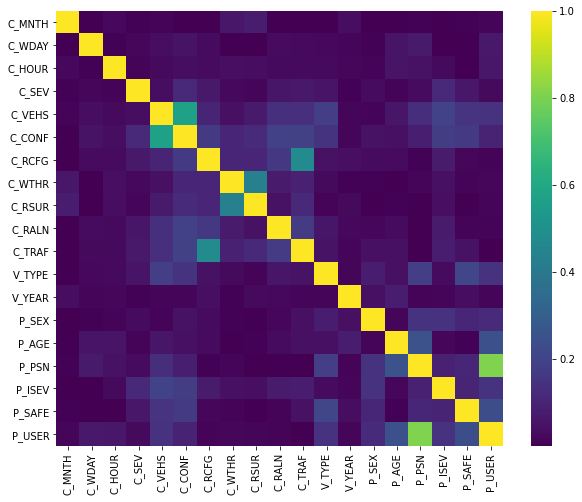

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap = 'viridis')
plt.show()

In [ ]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr.correlation > 0.1]

,level_0,level_1,correlation
357,P_USER,P_PSN,0.806448
99,C_CONF,C_VEHS,0.569530
196,C_TRAF,C_RCFG,0.476038
159,C_RSUR,C_WTHR,0.431270
299,P_PSN,P_AGE,0.252754
356,P_USER,P_AGE,0.246080
359,P_USER,P_SAFE,0.232074
334,P_SAFE,V_TYPE,0.208211
308,P_ISEV,C_VEHS,0.196764
195,C_TRAF,C_CONF,0.194745


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# separamos la variable target del resto de variables
X = df_car_t.drop('C_SEV', axis=1)
Y = df_car_t.C_SEV

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size=0.2, random_state=0)

In [ ]:
sm = SMOTE(random_state = 12345, n_jobs=-1, sampling_strategy=0.4)
X_train_sampled, y_train_sampled =sm.fit_resample(xtrain, ytrain)
X_train = pd.DataFrame(X_train_sampled, columns = xtrain.columns)
y_train = pd.DataFrame(y_train_sampled, columns = ytrain.columns)

In [ ]:
print(len(X_train))
print(len(xtest))
print(len(y_train))
print(len(ytest))

5992439
1172081
5992439
1172081


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_sampled)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_sampled), columns=X_train_sampled.columns, index=X_train_sampled.index)
X_test_scaled = pd.DataFrame(scaler.transform(xtest), columns=xtest.columns, index=xtest.index)

In [ ]:
print(len(X_train_scaled))
print(len(X_test_scaled))
print(len(y_train))
print(len(ytest))

5992439
1172081
5992439
1172081


In [ ]:
##PCA

In [ ]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
# conda install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


In [ ]:
pca = PCA()#primero lo hago sin fijar el número de componentes para visualizar la varianza

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

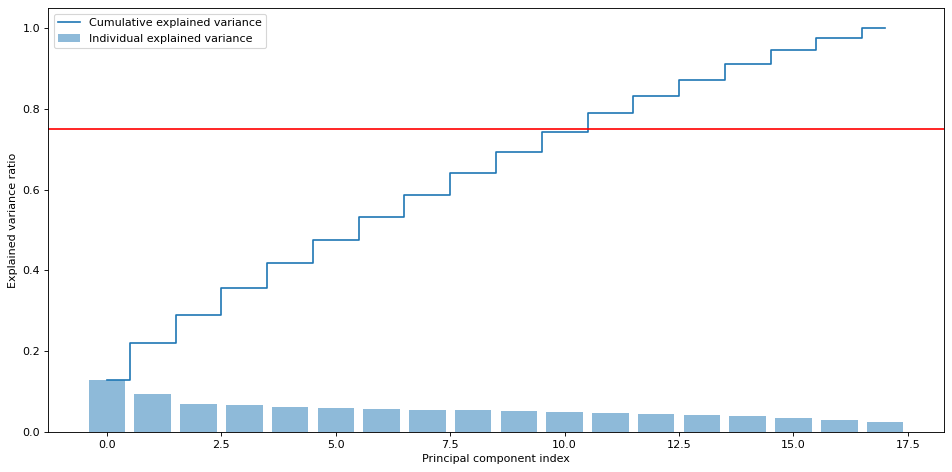

In [ ]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.25
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=10)

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.75
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.columns = ['PCA_'+str(i) for i in X_train_pca.columns]
X_test_pca.columns = ['PCA_'+str(i) for i in X_test_pca.columns]
X_train_pca.head()

In [ ]:
X_train_pca.shape

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn import metrics

from sklearn.metrics import classification_report

import pickle 

In [ ]:
SD

In [ ]:
## MODELO XGBOOST

In [ ]:
param_test = {
 'learning_rate':np.arange(0.1,2.0,0.2),
 'objective':['binary:logistic'],
 'gamma': [0.5, 1, 2],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.6, 1.0],
 'max_depth': [4, 5, 8]
}
gXGBoost = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=80, subsample=0.8,
                                                             colsample_bytree=0.8,objective= 'binary:logistic',
                                                             scale_pos_weight=1), 
                               param_grid = param_test, scoring='roc_auc',n_jobs=-1)

In [ ]:
gXGBoost.fit(X_train_pca, y_train)

In [ ]:
gXGBoost.best_estimator_

In [ ]:
gXGBoost.best_params_

In [ ]:
LeadScore = gXGBoost.predict_proba(X_test_pca)
print(LeadScore)

In [ ]:
pred = gXGBoost.predict(X_test_pca)

print(pred)

In [ ]:
### Model Statistics

In [ ]:
accuracy_score(ytest, pred)

In [ ]:
print(classification_report(ytest, pred))

In [ ]:
### Confusion Matrix

In [ ]:
confusion_matrix = confusion_matrix(ytest, pred)
confusion_matrix = pd.DataFrame(confusion_matrix)

In [ ]:
def conf_matrix(ytest, pred):
    conf_plot = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_ylabel('Predicted Label')
    conf_plot.set_xlabel('True Label');

In [ ]:
conf_matrix(ytest, pred)

In [ ]:
### Confusion Matrix Normalized

In [ ]:
confusion_matrix_normalize = confusion_matrix(ytest, pred, normalize = 'pred')
confusion_matrix_normalize = pd.DataFrame(confusion_matrix_normalize)

In [ ]:
def conf_matrix(ytest, pred):
    conf_plot = sns.heatmap(confusion_matrix_normalize, annot = True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix")

In [ ]:
conf_matrix(ytest, pred)

In [ ]:
### ROC Curve

In [ ]:
predicted_probas = gXGBoost.predict_proba(X_test_pca)

In [ ]:
skplt.metrics.plot_cumulative_gain(ytest, predicted_probas)
plt.show()

In [ ]:
### Lift Curve

In [ ]:
skplt.metrics.plot_lift_curve(ytest, predicted_probas)
plt.show()

In [ ]:
### Histogram

In [ ]:
y_pred_prob = predicted_probas[:, 1]

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob, bins=25,facecolor='royalblue', edgecolor = 'black')
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [ ]:
# Plot 
my_plots = plot_partial_dependence(xgb.XGBClassifier,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X_train_scaled,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10)

In [ ]:
### Save the model 

In [ ]:
model = gXGBoost
filename = 'XGB.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename3 = 'RandomForest.sav'
XGB = pickle.load(open(filename3, 'rb'))
pred = XGB.predict(X_test)
accuracy_score(ytest, pred) 